In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/5a178d63-372d-48c4-adb8-d616130ba3f0___FREC_Scab 3104.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/8bcbb4fb-c733-4fc7-92d2-6e4a442e592e___FREC_Scab 3506.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/2bc018ba-3c49-4cf4-9411-a93b7b196f45___FREC_Scab 3326.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/f18c0441-917e-4f34-b26e-a1a71d0adec2___FREC_Scab 3429.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/bc7769cc-805e-42ef-bbcf-0c134ff03276___FREC_Scab 2909.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/48dcb319-8b65-4bac-bba4-aa8ffa8abdd0___FREC_Scab 3519.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/45e34a1f-1d46-42e8-921d-c82f2c9e7cd1___FREC_Scab 3228.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/ff99efdc-a9f8-4360-9c64-f8274f456be5___FREC_Scab 3161.JPG
/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/24d43ad3-24e6-4236-8ef7-59b268520ca3___FR

In [2]:
base_dir = '/kaggle/input/appleplant-disease/dl'

(256, 256, 3)


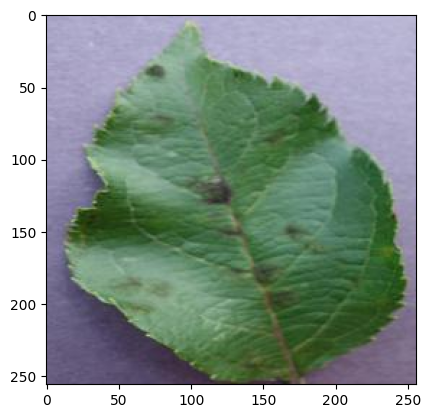

In [3]:
image_path = '/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(image_path)


print(img.shape)
plt.imshow(img)
plt.axis()
plt.show()

In [4]:
image_path = '/kaggle/input/appleplant-disease/dl/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = mpimg.imread(image_path)
print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

2024-04-08 17:19:49.975659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 17:19:49.975762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 17:19:50.162964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
img_size = 224
batch_size = 64

In [8]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

In [9]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
)


Found 2537 images belonging to 4 classes.


In [15]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 634 images belonging to 4 classes.


**MODEL 1**

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,796,420 (182.33 MB)

 Trainable params: 47,796,420 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/39 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5391 - loss: 7.7401 

I0000 00:00:1712596872.656736      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712596872.676572      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/39 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.4752 - loss: 5.8258

W0000 00:00:1712596888.038350      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5074 - loss: 5.1423

W0000 00:00:1712596890.270785      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 35s 523ms/step - accuracy: 0.5111 - loss: 5.0711 - val_accuracy: 0.8455 - val_loss: 0.4500
Epoch 2/5
 1/39 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8281 - loss: 0.4702

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8281 - loss: 0.4702 - val_accuracy: 0.8276 - val_loss: 0.4130
Epoch 3/5


W0000 00:00:1712596896.635847      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.8894 - loss: 0.2814 - val_accuracy: 0.9253 - val_loss: 0.2406
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1599 - val_accuracy: 0.8621 - val_loss: 0.2609
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9534 - loss: 0.1417 - val_accuracy: 0.9306 - val_loss: 0.2039


In [17]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.9299 - loss: 0.2004
Validation Accuracy: 93.23%


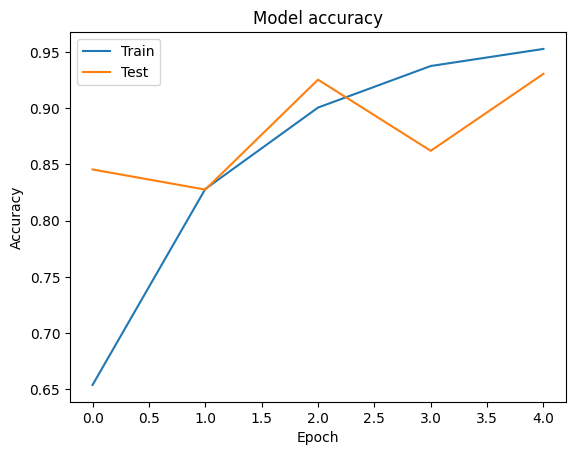

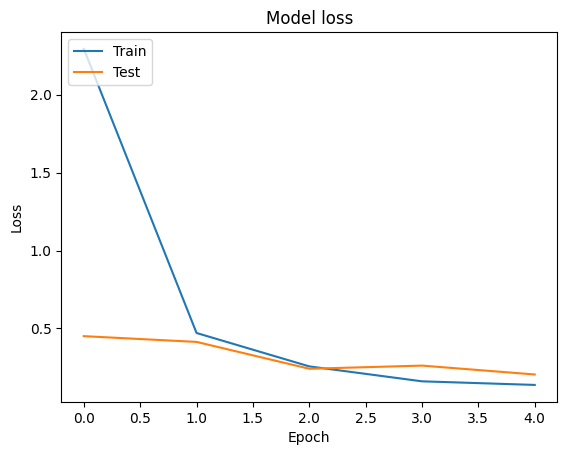

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     

**Function For loading/preprocessing and predicting_image**

In [19]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
  
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [20]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [21]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy'}

In [22]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [40]:
image_path = '//kaggle/input/appleplant-disease/dl/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name: Apple___Apple_scab


**Model 2(VGG16)**

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

# Load pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_model.layers:
    layer.trainable = False


model1 = models.Sequential()
model1.add(vgg16_model)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(4, activation='softmax'))


learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/5


W0000 00:00:1712597326.598254     100 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5401 - loss: 3.0895

W0000 00:00:1712597337.530025     100 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5518 - loss: 2.9740

W0000 00:00:1712597339.608401      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 397ms/step - accuracy: 0.5554 - loss: 2.9386 - val_accuracy: 0.9149 - val_loss: 0.2661
Epoch 2/5
 1/39 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.8281 - loss: 0.4725

W0000 00:00:1712597342.682908      99 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8281 - loss: 0.4725 - val_accuracy: 0.9310 - val_loss: 0.1890
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.8823 - loss: 0.3275 - val_accuracy: 0.9566 - val_loss: 0.1521
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8594 - loss: 0.3232 - val_accuracy: 0.9310 - val_loss: 0.1857
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.9274 - loss: 0.2080 - val_accuracy: 0.9635 - val_loss: 0.1159


In [27]:
print("Evaluating model...")
val_loss, val_accuracy = model1.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9550 - loss: 0.1185
Validation Accuracy: 96.35%


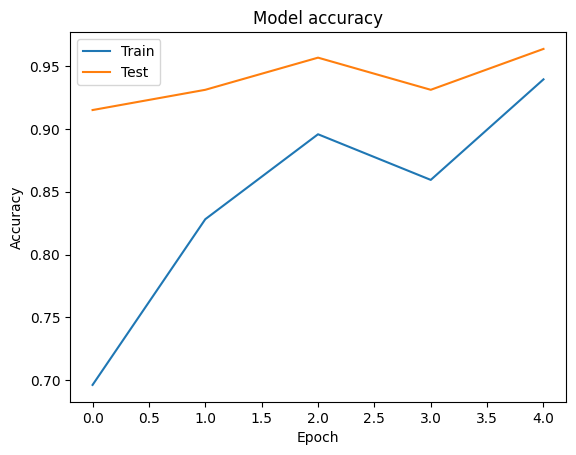

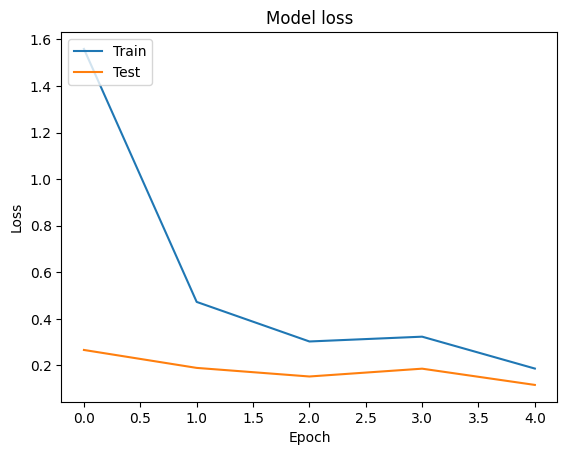

In [28]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
image_path = '/kaggle/input/appleplant-disease/dl/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'
predicted_class_name = predict_image_class(model1, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class Name: Apple___Black_rot


**Model 3(InceptionV3)**

In [36]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, layers, optimizers

# Load pre-trained InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in inception_model.layers:
    layer.trainable = False


model4 = models.Sequential()
model4.add(inception_model)
model4.add(layers.GlobalAveragePooling2D())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='softmax'))  # num_classes should be defined

# Compile the model with custom learning rate
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/5
 1/39 ━━━━━━━━━━━━━━━━━━━━ 9:03 14s/step - accuracy: 0.2656 - loss: 1.5294

W0000 00:00:1712597729.963831      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/39 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4291 - loss: 1.7678  

W0000 00:00:1712597736.027576     100 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.6270 - loss: 1.0778

W0000 00:00:1712597747.070240      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 488ms/step - accuracy: 0.6304 - loss: 1.0678 - val_accuracy: 0.9132 - val_loss: 0.2600
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9219 - loss: 0.2238 - val_accuracy: 0.8448 - val_loss: 0.3823
Epoch 3/5


W0000 00:00:1712597751.746045      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.9122 - loss: 0.2899 - val_accuracy: 0.9271 - val_loss: 0.1987
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2010 - val_accuracy: 0.9483 - val_loss: 0.2123
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9285 - loss: 0.2218 - val_accuracy: 0.9479 - val_loss: 0.1536


In [37]:
print("Evaluating model...")
val_loss, val_accuracy = model4.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9524 - loss: 0.1502
Validation Accuracy: 94.97%


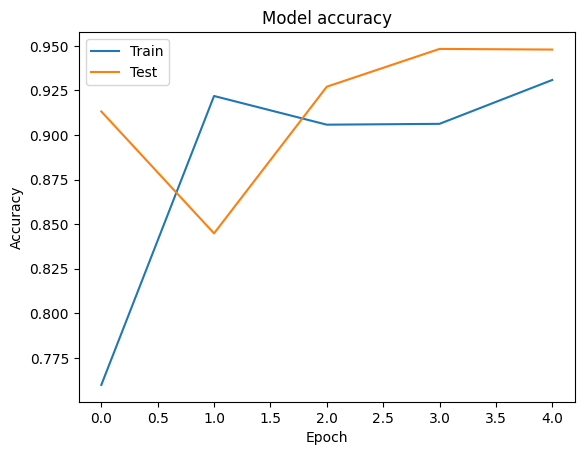

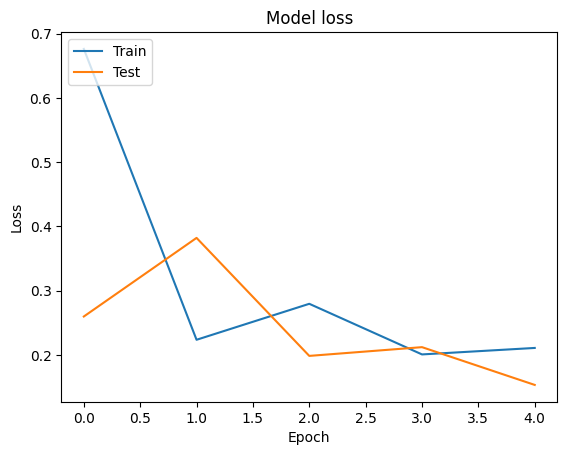

In [38]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
image_path = '/kaggle/input/appleplant-disease/dl/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG'
predicted_class_name = predict_image_class(model4, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class Name: Apple___healthy
